In [1]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['Opioid_EMS']
collection = db['Calls']

In [3]:
# Fetch data from MongoDB and convert to DataFrame
data = list(collection.find())
df = pd.DataFrame(data)

In [4]:
# Display first few rows of the DataFrame
df

,_id,X,Y,OBJECTID,Incident_Date,Weekday,Weekday_Sort,Month,Month_Sort,Year,...,Age,Patient_Gender,Patient_ASU,Patient_Veteran,Patient_Homeless,Latitude_Random,Longitude_Random,Spec_Pop,Notes,Time_of_Day
0,672d3b83d2d34949192fd28c,-111.8904,33.4196,1,2017/01/03 00:00:00+00,Tuesday,(3) Tuesday,January,(01) January,2017,...,40 to 44,Female,No,No,No,33.4196,-111.8904,None,None,Morning
1,672d3b83d2d34949192fd28d,-111.9505,33.4127,2,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,40 to 44,Male,No,No,No,33.4127,-111.9505,None,None,Overnight
2,672d3b83d2d34949192fd28e,-111.9249,33.3971,3,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,20 to 24,Male,No,No,Yes,33.3971,-111.9249,Homeless,None,Overnight
3,672d3b83d2d34949192fd28f,-111.9334,33.4297,4,2017/01/09 00:00:00+00,Monday,(2) Monday,January,(01) January,2017,...,20 to 24,Male,No,No,Yes,33.4297,-111.9334,Homeless,None,Morning
4,672d3b83d2d34949192fd290,-111.9126,33.396,6,2017/01/11 00:00:00+00,Wednesday,(4) Wednesday,January,(01) January,2017,...,80 to 84,Male,No,No,No,33.396,-111.9126,None,None,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,672d3b83d2d34949192fe14b,-111.876,33.357,4136,2024/09/09 07:00:00+00,Monday,(2) Monday,September,(09) September,2024,...,35 to 39,Male,No,No,No,33.357,-111.876,No,,Afternoon
3776,672d3b83d2d34949192fe14c,-111.933,33.41,4137,2024/09/10 07:00:00+00,Tuesday,(3) Tuesday,September,(09) September,2024,...,25 to 29,Male,No,No,Yes,33.41,-111.933,Homeless,,Afternoon
3777,672d3b83d2d34949192fe14d,-111.926,33.438,4138,2024/09/11 07:00:00+00,Wednesday,(4) Wednesday,September,(09) September,2024,...,25 to 29,Male,No,No,Yes,33.438,-111.926,Homeless,,Evening
3778,672d3b83d2d34949192fe14e,-111.962,33.345,4139,2024/09/12 07:00:00+00,Thursday,(5) Thursday,September,(09) September,2024,...,50 to 54,Male,No,No,No,33.345,-111.962,No,,Morning


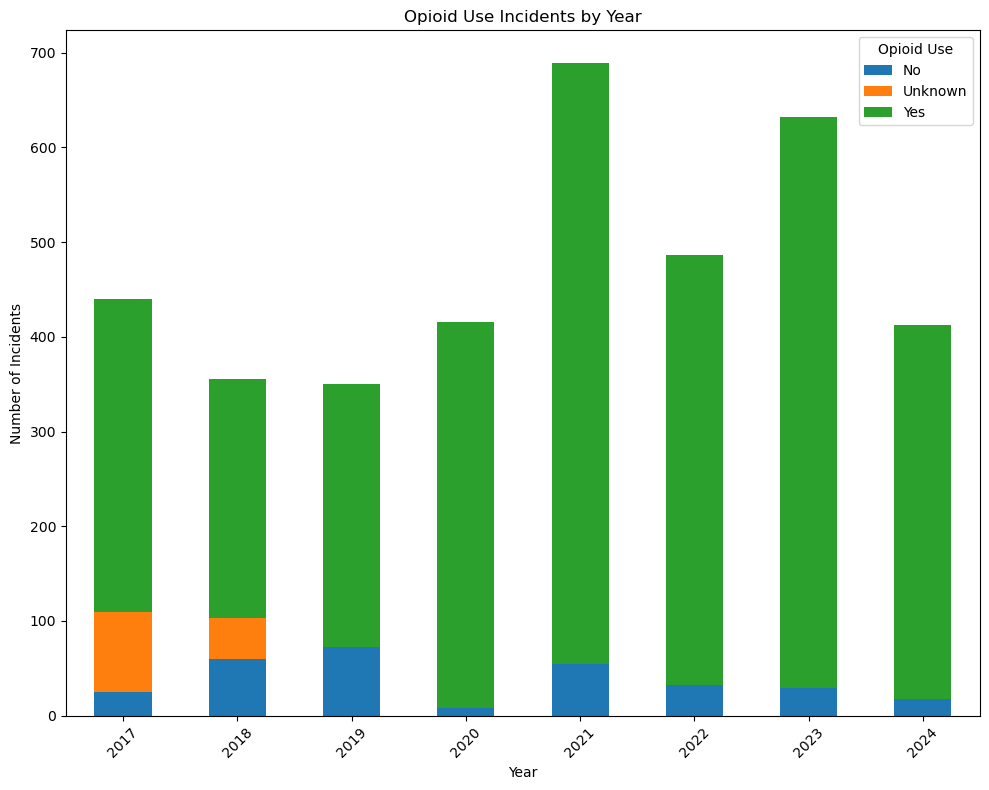

In [5]:
# Group the data by 'Year' and 'Opioid_Use' and count the number of incidents
opioid_by_year = df.groupby(['Year', 'Opioid_Use']).size().unstack().fillna(0)

# Plot the bar chart
opioid_by_year.plot(kind='bar', stacked=True, figsize=(10, 8))

# Customize the chart
plt.title('Opioid Use Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Opioid Use')

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
#  Count the number of incidents for each value of 'Narcan_Given'
narcan_counts = df['Narcan_Given'].value_counts()
narcan_counts

Narcan_Given
Yes     2319
No       950
NULL     352
         159
Name: count, dtype: int64

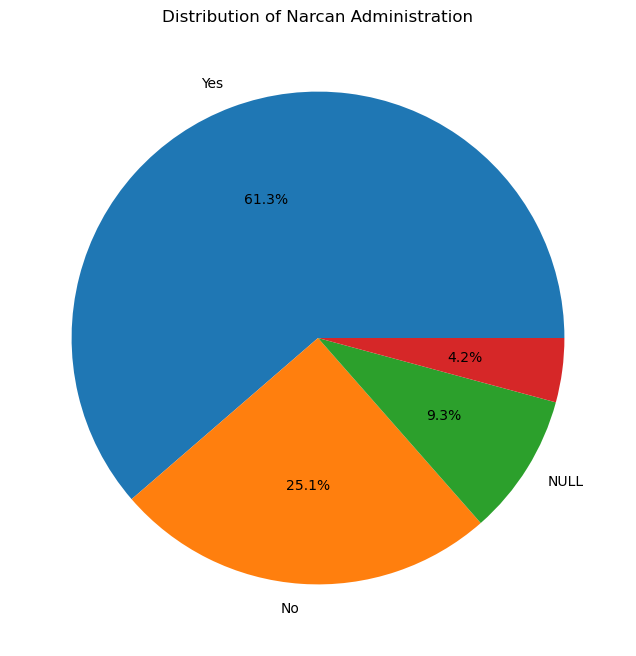

In [7]:
#  Count the number of incidents for each value of 'Narcan_Given'
narcan_counts = df['Narcan_Given'].value_counts()

# Plot the pie chart
narcan_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), legend=False)

# Customize the chart
plt.title('Distribution of Narcan Administration')

# Show the plot
plt.ylabel('')
plt.show()